In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Given Data -----
vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

print("Length of Vector 1:", len(vector1))
print("Length of Vector 2:", len(vector2))


Length of Vector 1: 11
Length of Vector 2: 13


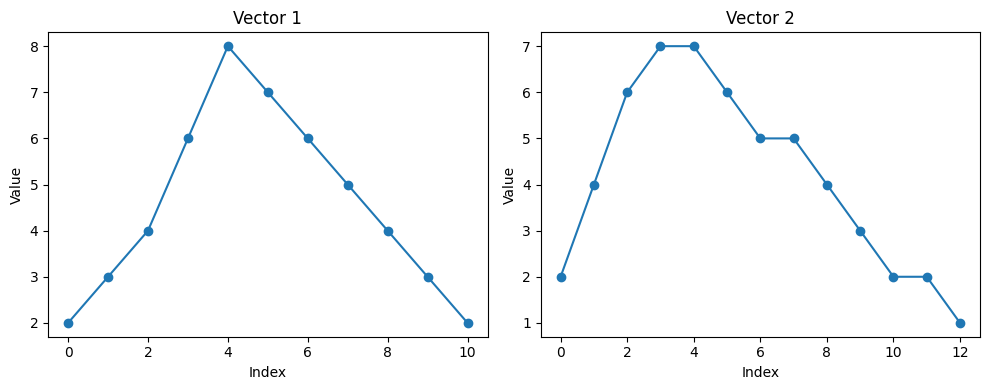

In [ ]:
# ----- Task 1: Plot original vectors -----

plt.figure(figsize=(10, 4))

# Plot Vector 1
plt.subplot(1, 2, 1)
plt.plot(vector1, marker='o')
plt.title("Vector 1")
plt.xlabel("Index")
plt.ylabel("Value")

# Plot Vector 2
plt.subplot(1, 2, 2)
plt.plot(vector2, marker='o')
plt.title("Vector 2")
plt.xlabel("Index")
plt.ylabel("Value")

plt.tight_layout()
plt.show()


In [ ]:
# ----- Task 2: Implement DTW and Accumulated Cost Matrix -----

def dtw(seq1, seq2):
    n = len(seq1)
    m = len(seq2)

    # Initialize cost matrix with infinity
    cost = np.full((n, m), np.inf)

    # Local distance for (0,0)
    cost[0, 0] = abs(seq1[0] - seq2[0])

    # First row
    for j in range(1, m):
        cost[0, j] = abs(seq1[0] - seq2[j]) + cost[0, j - 1]

    # First column
    for i in range(1, n):
        cost[i, 0] = abs(seq1[i] - seq2[0]) + cost[i - 1, 0]

    # Fill the rest of the matrix
    for i in range(1, n):
        for j in range(1, m):
            local_cost = abs(seq1[i] - seq2[j])
            cost[i, j] = local_cost + min(
                cost[i - 1, j],      # insertion
                cost[i, j - 1],      # deletion
                cost[i - 1, j - 1]   # match
            )

    # DTW distance is in the bottom-right cell
    dtw_distance = cost[-1, -1]

    return cost, dtw_distance

# Compute the cost matrix and DTW distance
cost_matrix, dtw_distance = dtw(vector1, vector2)

print("DTW Distance between Vector 1 and Vector 2:", dtw_distance)


DTW Distance between Vector 1 and Vector 2: 3.0


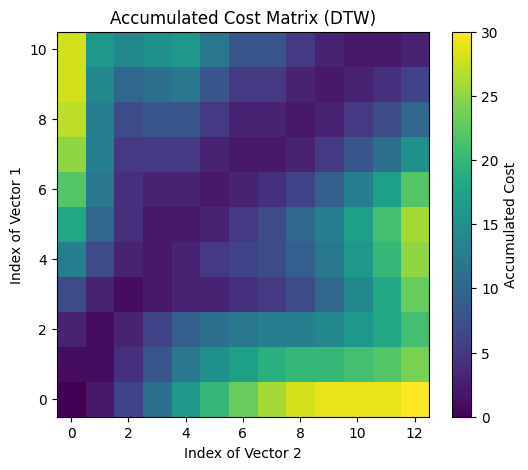

In [ ]:
# ----- Task 3: Visualize the Accumulated Cost Matrix -----

plt.figure(figsize=(6, 5))
plt.imshow(cost_matrix, origin='lower', aspect='auto')
plt.title("Accumulated Cost Matrix (DTW)")
plt.xlabel("Index of Vector 2")
plt.ylabel("Index of Vector 1")
plt.colorbar(label="Accumulated Cost")
plt.show()


In [ ]:
# ----- Task 4: Backtrack to find optimal warping path -----

def backtrack_path(cost):
    i, j = cost.shape[0] - 1, cost.shape[1] - 1
    path = [(i, j)]

    while i > 0 or j > 0:
        # Candidates: up (i-1, j), left (i, j-1), diagonal (i-1, j-1)
        moves = []
        if i > 0:
            moves.append((cost[i - 1, j], i - 1, j))
        if j > 0:
            moves.append((cost[i, j - 1], i, j - 1))
        if i > 0 and j > 0:
            moves.append((cost[i - 1, j - 1], i - 1, j - 1))

        # Choose the move with minimum cost
        cost_min, i, j = min(moves, key=lambda x: x[0])
        path.append((i, j))

    # Reverse to start from (0,0)
    path.reverse()
    return path

warping_path = backtrack_path(cost_matrix)

print("Warping Path (i, j pairs):")
print(warping_path)


Warping Path (i, j pairs):
[(0, 0), (1, 1), (2, 1), (3, 2), (4, 3), (5, 3), (5, 4), (6, 5), (7, 6), (7, 7), (8, 8), (9, 9), (10, 10), (10, 11), (10, 12)]


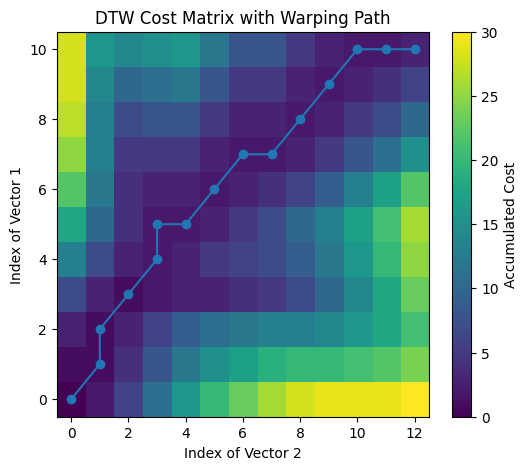

In [ ]:
# Convert path to separate lists of indices
path_i = [p[0] for p in warping_path]
path_j = [p[1] for p in warping_path]

plt.figure(figsize=(6, 5))
plt.imshow(cost_matrix, origin='lower', aspect='auto')
plt.title("DTW Cost Matrix with Warping Path")
plt.xlabel("Index of Vector 2")
plt.ylabel("Index of Vector 1")
plt.colorbar(label="Accumulated Cost")

# Overlay warping path
plt.plot(path_j, path_i, marker='o')
plt.show()


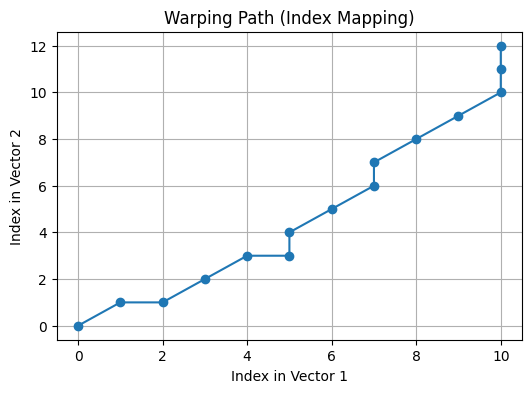

In [ ]:
# Plot index mapping (Warping Path)

plt.figure(figsize=(6, 4))
plt.plot(path_i, path_j, marker='o')
plt.title("Warping Path (Index Mapping)")
plt.xlabel("Index in Vector 1")
plt.ylabel("Index in Vector 2")
plt.grid(True)
plt.show()


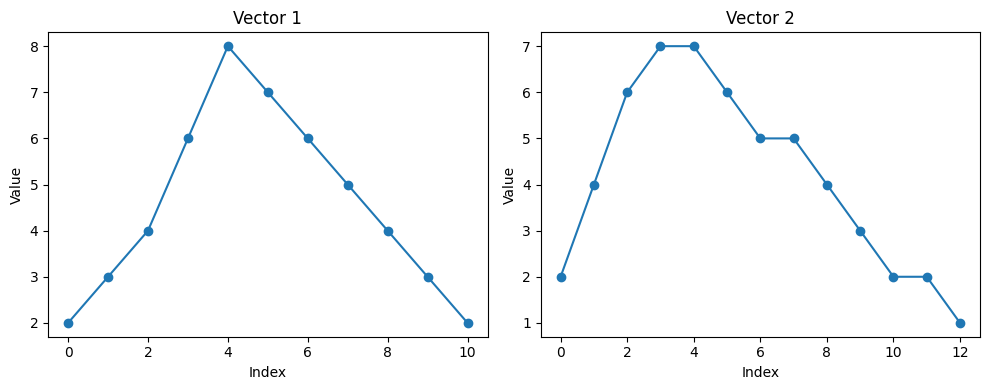

In [ ]:
#Show how samples correspond using the warping path

plt.figure(figsize=(10, 4))

# Plot Vector 1
plt.subplot(1, 2, 1)
plt.plot(vector1, marker='o')
plt.title("Vector 1")
plt.xlabel("Index")
plt.ylabel("Value")

# Plot Vector 2
plt.subplot(1, 2, 2)
plt.plot(vector2, marker='o')
plt.title("Vector 2")
plt.xlabel("Index")
plt.ylabel("Value")

plt.tight_layout()
plt.show()


Inference:
Dynamic Time Warping (DTW) was used to compare and align two numerical sequences of different lengths and slight temporal distortions. The accumulated cost matrix shows how the alignment cost builds up as we move through both vectors. The optimal warping path obtained by backtracking from the bottom-right of the matrix to the top-left illustrates a non-linear mapping between the indices of Vector 1 and Vector 2. This path sometimes stays on the same sample in one vector while moving ahead in the other, effectively allowing local stretching or compression along the time axis. The computed DTW distance provides a single quantitative measure of similarity between the sequences: a smaller DTW distance indicates that the two vectors have very similar shapes, even if they are shifted or stretched in time. Thus, DTW successfully aligns the two vectors by “warping” time, making it a powerful tool for comparing patterns that are similar in shape but not perfectly synchronized.